# Práctica 1: Datos y exploración de datos

Duración: 2 sesiones

Apartado 1.1: Datos

Realice los siguientes ejercicios usando el módulo Pandas y cualquier otro módulo adicional que considere. Para evaluar el
efecto de las operaciones de preprocesado vamos a considerar un árbol de decisión y un clasificador de vecino más
cercano. Usamos estos dos clasificadores debido a su diferente naturaleza.
Evaluaremos el efecto de aplicar el preprocesado midiendo el rendimiento de los dos clasificadores usando la medida de
error de clasificación.

1. Obtenga 5 ejemplos de ficheros de datos en formato CSV, ARFF u otro cualquiera de:
◦ Weka datasets
◦ UCI MLR
2. Evalúe el árbol de decisión y el vecino más cercano sobre los datos originales.
3. Estudie el efecto de la normalización (reescalar en el intervalo [0, 1]) y la estandarización (μ = 0, σ = 1) sobre
el error de clasificación usando el árbol de decisión y el vecino más cercano. Comente los resultados.
4. Estudie el efecto del análisis en componentes principales sobre el árbol de decisión y el vecino más cercano.
Comente lo resultados. Estudie el efecto según el número de componentes retenidas.
5. Estudie el efecto del muestreo aleatorio del 10% de las instancias sin reemplazamiento sobre el árbol de
decisión y el vecino más cercano. Comente lo resultados. Compare los resultados con un muestreo del mismo
porcentaje pero estratificado.
6. Valores perdidos. Existen diferentes métodos para imputar valores perdidos en la biblioteca scikit learn
(https://scikit-learn.org/stable/modules/impute.html). Seleccione un conjunto de datos con valores
perdidos y dos métodos de imputación. Estudie el efecto de los métodos de imputación sobre los dos
clasificadores.
7. Selección de características. Existen diferentes métodos de selección de características en la biblioteca scikit
learn ( htt ps://scikit-learn.org/stable/modules/feature_selection.html). Seleccione un conjunto de datos con un
número elevado de atributos y dos métodos de selección de características. Estudie el efecto de los métodos
sobre los dos clasificadores.
8. Discretización. Existen diferentes métodos de discretización en la biblioteca scikit learn
(https://scikit-learn.org/stable/modules/preprocessing.html#discretization). Seleccione un conjunto de datos y
un método de discretización. Estudie el efecto del método sobre los dos clasificadores.

NOTAS:
* El apartado del manual de scikit learn destinado a preprocesamiento se puede acceder en https://scikitlearn.org/stable/modules/preprocessing.html
* Los ejercicios marcados con un * son opcionales.
* Se pueden repasar los conocimientos básicos del uso de clasificadores y su evaluación en la documentación de la
práctica 2.

In [61]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
!wget https://storm.cis.fordham.edu/~gweiss/data-mining/weka-data/ionosphere.arff
!wget https://storm.cis.fordham.edu/~gweiss/data-mining/weka-data/diabetes.arff
!wget https://storm.cis.fordham.edu/~gweiss/data-mining/weka-data/iris.arff
!wget https://storm.cis.fordham.edu/~gweiss/data-mining/weka-data/cpu.arff

--2024-02-09 19:58:49--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-red.csv.2’

winequality-red.csv     [ <=>                ]  82.23K  --.-KB/s    in 0.1s    

2024-02-09 19:58:50 (843 KB/s) - ‘winequality-red.csv.2’ saved [84199]

--2024-02-09 19:58:50--  https://storm.cis.fordham.edu/~gweiss/data-mining/weka-data/ionosphere.arff
Resolving storm.cis.fordham.edu (storm.cis.fordham.edu)... 150.108.68.26
Connecting to storm.cis.fordham.edu (storm.cis.fordham.edu)|150.108.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80385 (79K) [text/plain]
Saving to: ‘ionosphere.arff.2’

ionosphere.arff.2   100%[===================>]  78.50K  --.-KB/s    in 0.08s   

2024-02-

# Exercise 2

In [6]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt

data = arff.loadarff('ionosphere.arff')
df_iono = pd.DataFrame(data[0])

data = arff.loadarff('diabetes.arff')
df_diabe = pd.DataFrame(data[0])

data = arff.loadarff('iris.arff')
df_iris = pd.DataFrame(data[0])

data = arff.loadarff('cpu.arff')
df_cpu = pd.DataFrame(data[0])

df_wine = pd.read_csv('winequality-red.csv', sep=";")

In [7]:
df_cpu.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,class
0,125.0,256.0,6000.0,256.0,16.0,128.0,198.0
1,29.0,8000.0,32000.0,32.0,8.0,32.0,269.0
2,29.0,8000.0,32000.0,32.0,8.0,32.0,220.0
3,29.0,8000.0,32000.0,32.0,8.0,32.0,172.0
4,29.0,8000.0,16000.0,32.0,8.0,16.0,132.0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['MYCT'].plot(kind='hist', bins=20, title='MYCT')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['MMIN'].plot(kind='hist', bins=20, title='MMIN')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['MMAX'].plot(kind='hist', bins=20, title='MMAX')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='MYCT', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='MYCT', y='MMIN', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='MMIN', y='MMAX', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='MMAX', y='CACH', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['MYCT']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('MYCT')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['MMAX']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('MMAX')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['CACH']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('CACH')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['CHMIN']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('CHMIN')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['MYCT'].plot(kind='line', figsize=(8, 4), title='MYCT')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['MMIN'].plot(kind='line', figsize=(8, 4), title='MMIN')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['MMAX'].plot(kind='line', figsize=(8, 4), title='MMAX')
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df_iono.head()

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
0,1.0,0.0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,b'g'
1,1.0,0.0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b'b'
2,1.0,0.0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,b'g'
3,1.0,0.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b'b'
4,1.0,0.0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,b'g'


In [10]:
df_diabe.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,b'tested_positive'
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,b'tested_negative'
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,b'tested_positive'
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,b'tested_negative'
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,b'tested_positive'


In [11]:
df_iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,b'Iris-setosa'
1,4.9,3.0,1.4,0.2,b'Iris-setosa'
2,4.7,3.2,1.3,0.2,b'Iris-setosa'
3,4.6,3.1,1.5,0.2,b'Iris-setosa'
4,5.0,3.6,1.4,0.2,b'Iris-setosa'


In [12]:
# Changing the last categorical class value into a numerical value

df_iono['class'] = pd.factorize(df_iono['class'])[0]

df_iono.head()

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
0,1.0,0.0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,0
1,1.0,0.0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,1
2,1.0,0.0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,0
3,1.0,0.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,1
4,1.0,0.0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,0


In [13]:
df_diabe['class'] = pd.factorize(df_diabe['class'])[0]

df_diabe.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,1
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0


In [14]:
df_iris['class'] = pd.factorize(df_iris['class'])[0]

df_iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
from sklearn.neighbors import KNeighborsClassifier
# ionosphere

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_iono.iloc[:, 0:len(df_iono.columns) - 1],
                                                    df_iono.iloc[:, len(df_iono.columns) - 1], random_state=42,
                                                    test_size=0.3)


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

old_knn_score = metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.8490566037735849


In [16]:
from sklearn.neighbors import KNeighborsClassifier
# diabetes

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_diabe.iloc[:, 0:len(df_diabe.columns) - 1],
                                                    df_diabe.iloc[:, len(df_diabe.columns) - 1], random_state=42,
                                                    test_size=0.3)


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

old_knn_score = metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.6753246753246753


In [17]:
from sklearn.neighbors import KNeighborsClassifier
# iris

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_iris.iloc[:, 0:len(df_iris.columns) - 1],
                                                    df_iris.iloc[:, len(df_iris.columns) - 1], random_state=42,
                                                    test_size=0.3)


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

old_knn_score = metrics.accuracy_score(y_test, y_pred)

Accuracy: 1.0


In [18]:
from sklearn.neighbors import KNeighborsClassifier
# Red wine quality

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_wine.iloc[:, 0:len(df_wine.columns) - 1],
                                                    df_wine.iloc[:, len(df_wine.columns) - 1], random_state=42,
                                                    test_size=0.3)


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

old_knn_score = metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.4479166666666667


In [19]:
from sklearn.neighbors import KNeighborsClassifier
# CPU

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_cpu.iloc[:, 0:len(df_cpu.columns) - 1],
                                                    df_cpu.iloc[:, len(df_cpu.columns) - 1], random_state=42,
                                                    test_size=0.3)


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

old_knn_score = metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.015873015873015872


In [20]:
from sklearn import tree
# ionosphere

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_iono.iloc[:, 0:len(df_iono.columns) - 1],
                                                    df_iono.iloc[:, len(df_iono.columns) - 1], random_state=42,
                                                    test_size=0.3)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
old_tree_score = clf.score(X_test, y_test)

print("Accuracy:", old_tree_score)

Accuracy: 0.8867924528301887


In [21]:
from sklearn import tree
# Diabetes

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_diabe.iloc[:, 0:len(df_diabe.columns) - 1],
                                                    df_diabe.iloc[:, len(df_diabe.columns) - 1], random_state=42,
                                                    test_size=0.3)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
old_tree_score = clf.score(X_test, y_test)

print("Accuracy:", old_tree_score)

Accuracy: 0.7012987012987013


In [22]:
from sklearn import tree
# Iris

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_iris.iloc[:, 0:len(df_iris.columns) - 1],
                                                    df_iris.iloc[:, len(df_iris.columns) - 1], random_state=42,
                                                    test_size=0.3)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
old_tree_score = clf.score(X_test, y_test)

print("Accuracy:", old_tree_score)

Accuracy: 1.0


In [23]:
from sklearn import tree
# Wine

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_wine.iloc[:, 0:len(df_wine.columns) - 1],
                                                    df_wine.iloc[:, len(df_wine.columns) - 1], random_state=42,
                                                    test_size=0.3)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
old_tree_score = clf.score(X_test, y_test)

print("Accuracy:", old_tree_score)

Accuracy: 0.5770833333333333


In [24]:
from sklearn import tree
# CPU

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_cpu.iloc[:, 0:len(df_cpu.columns) - 1],
                                                    df_cpu.iloc[:, len(df_cpu.columns) - 1], random_state=42,
                                                    test_size=0.3)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
old_tree_score = clf.score(X_test, y_test)

print("Accuracy:", old_tree_score)

Accuracy: 0.047619047619047616


# Exercise 3

In [25]:
from sklearn import preprocessing

# Functions for standardize and normalize

def standardize(df: pd.DataFrame):
    res = df.copy()
    scaler = preprocessing.StandardScaler()

    num_df = df.select_dtypes(exclude=['object', 'category'])
    res[num_df.columns] = scaler.fit_transform(num_df)
    return res

def normalize(df: pd.DataFrame):
    res = df.copy()
    scaler = preprocessing.MinMaxScaler()

    num_df = df.select_dtypes(exclude=['object', 'category'])
    res[num_df.columns] = scaler.fit_transform(num_df)
    return res


In [26]:
# Ionosphere

df_iono_normalized_rescaled = standardize(df_iono)
df_iono_normalized_rescaled = standardize(df_iono_normalized_rescaled)

# Transforming the last class attribute into a numerical value
df_iono_normalized_rescaled['class'] = pd.factorize(df_iono_normalized_rescaled['class'])[0]

df_iono_normalized_rescaled.head()

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
0,0.348433,0.0,0.712372,-0.234257,0.484208,-0.201735,0.577059,-0.954679,0.964074,-0.297510,...,-0.867565,-0.253868,-0.713971,-0.288290,-0.617039,0.122937,-1.055054,-0.312221,-0.999595,0
1,0.348433,0.0,0.721648,-0.527811,0.634308,-1.037587,-1.339106,-2.029452,0.964074,-0.469482,...,-0.383054,-1.447849,-0.208419,-0.989185,-0.173530,-0.909063,-0.115213,-0.932605,-0.083286,1
2,0.348433,0.0,0.721648,-0.176998,0.768477,-0.241309,0.914531,-0.461494,0.746139,-0.350536,...,-0.651896,0.093506,-0.276586,0.091389,-0.287320,0.441318,-0.464092,0.404443,-0.848591,0
3,0.348433,0.0,0.721648,-1.125172,0.768477,1.921340,0.329433,-2.152585,-1.010873,-0.375331,...,1.926340,-0.049490,1.947300,1.080843,-0.341218,-0.167687,1.957315,-1.289826,2.107299,1
4,0.348433,0.0,0.721648,-0.155129,0.655594,-0.109918,0.754068,-0.676741,0.512838,-0.714742,...,-1.143025,-0.792950,-0.842112,-0.615818,-1.171144,-0.717726,-1.154227,-0.757673,-1.435736,0


In [27]:
from sklearn.neighbors import KNeighborsClassifier
# ionosphere

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_iono_normalized_rescaled.iloc[:, 0:len(df_iono_normalized_rescaled.columns) - 1],
                                                    df_iono_normalized_rescaled.iloc[:, len(df_iono_normalized_rescaled.columns) - 1], random_state=42,
                                                    test_size=0.3)


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

new_knn_score = metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.839622641509434


In [28]:
from sklearn import tree
# Ionosphere

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_iono_normalized_rescaled.iloc[:, 0:len(df_iono_normalized_rescaled.columns) - 1],
                                                    df_iono_normalized_rescaled.iloc[:, len(df_iono_normalized_rescaled.columns) - 1], random_state=42,
                                                    test_size=0.3)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
old_tree_score = clf.score(X_test, y_test)

print("Accuracy:", old_tree_score)

Accuracy: 0.9056603773584906


In [29]:
# Diabetes

df_diabe_normalized_rescaled = standardize(df_diabe)
df_diabe_normalized_rescaled = standardize(df_diabe_normalized_rescaled)

# Transforming the last class attribute into a numerical value
df_diabe_normalized_rescaled['class'] = pd.factorize(df_diabe_normalized_rescaled['class'])[0]

df_diabe_normalized_rescaled.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,0
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,1
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,0
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,1
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,0


In [30]:
from sklearn.neighbors import KNeighborsClassifier
# ionosphere

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_diabe_normalized_rescaled.iloc[:, 0:len(df_diabe_normalized_rescaled.columns) - 1],
                                                    df_diabe_normalized_rescaled.iloc[:, len(df_diabe_normalized_rescaled.columns) - 1], random_state=42,
                                                    test_size=0.3)


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

new_knn_score = metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.70995670995671


In [31]:
from sklearn import tree
# Ionosphere

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_diabe_normalized_rescaled.iloc[:, 0:len(df_diabe_normalized_rescaled.columns) - 1],
                                                    df_diabe_normalized_rescaled.iloc[:, len(df_diabe_normalized_rescaled.columns) - 1], random_state=42,
                                                    test_size=0.3)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
old_tree_score = clf.score(X_test, y_test)

print("Accuracy:", old_tree_score)

Accuracy: 0.7142857142857143


In [32]:
# iris

df_iris_normalized_rescaled = standardize(df_iris)
df_iris_normalized_rescaled = standardize(df_iris_normalized_rescaled)

# Transforming the last class attribute into a numerical value
df_iris_normalized_rescaled['class'] = pd.factorize(df_iris_normalized_rescaled['class'])[0]

df_iris_normalized_rescaled.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0


In [33]:
from sklearn.neighbors import KNeighborsClassifier
# ionosphere

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_iris_normalized_rescaled.iloc[:, 0:len(df_iris_normalized_rescaled.columns) - 1],
                                                    df_iris_normalized_rescaled.iloc[:, len(df_iris_normalized_rescaled.columns) - 1], random_state=42,
                                                    test_size=0.3)


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

new_knn_score = metrics.accuracy_score(y_test, y_pred)

Accuracy: 1.0


In [34]:
from sklearn import tree
# Ionosphere

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_iris_normalized_rescaled.iloc[:, 0:len(df_iris_normalized_rescaled.columns) - 1],
                                                    df_iris_normalized_rescaled.iloc[:, len(df_iris_normalized_rescaled.columns) - 1], random_state=42,
                                                    test_size=0.3)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
old_tree_score = clf.score(X_test, y_test)

print("Accuracy:", old_tree_score)

Accuracy: 0.9555555555555556


In [35]:
# wine
from sklearn import preprocessing


df_wine_normalized_rescaled = standardize(df_wine)
df_wine_normalized_rescaled  = standardize(df_wine_normalized_rescaled )

df_wine_normalized_rescaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


In [37]:
from sklearn.neighbors import KNeighborsClassifier
# ionosphere

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_wine_normalized_rescaled.iloc[:, 0:len(df_wine_normalized_rescaled.columns) - 1],
                                                    df_wine_normalized_rescaled.iloc[:, len(df_wine_normalized_rescaled.columns) - 1], random_state=42,
                                                    test_size=0.3)

# We need to transform the continuous output into a categorical value
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

new_knn_score = metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.5395833333333333


In [38]:
from sklearn import tree
# Ionosphere

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_wine_normalized_rescaled.iloc[:, 0:len(df_wine_normalized_rescaled.columns) - 1],
                                                    df_wine_normalized_rescaled.iloc[:, len(df_wine_normalized_rescaled.columns) - 1], random_state=42,
                                                    test_size=0.3)

# We need to transform the continuous output into a categorical value
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
old_tree_score = clf.score(X_test, y_test)

print("Accuracy:", old_tree_score)

Accuracy: 0.5833333333333334


In [39]:
# cpu
from sklearn import preprocessing

df_cpu_normalized_rescaled = standardize(df_cpu)
df_cpu_normalized_rescaled  = standardize(df_cpu_normalized_rescaled)

df_cpu_normalized_rescaled.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,class
0,-0.303586,-0.675026,-0.495462,5.694208,1.661989,4.231033,0.575759
1,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479,1.018277
2,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479,0.712877
3,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479,0.413710
4,-0.673330,1.326291,0.359350,0.167629,0.485509,-0.087447,0.164405


In [40]:
from sklearn.neighbors import KNeighborsClassifier
# cpu

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_cpu_normalized_rescaled.iloc[:, 0:len(df_cpu_normalized_rescaled.columns) - 1],
                                                    df_cpu_normalized_rescaled.iloc[:, len(df_cpu_normalized_rescaled.columns) - 1], random_state=42,
                                                    test_size=0.3)

# We need to transform the continuous output into a categorical value
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

new_knn_score = metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.047619047619047616


In [41]:
from sklearn import tree
# Ionosphere

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_cpu_normalized_rescaled.iloc[:, 0:len(df_cpu_normalized_rescaled.columns) - 1],
                                                    df_cpu_normalized_rescaled.iloc[:, len(df_cpu_normalized_rescaled.columns) - 1], random_state=42,
                                                    test_size=0.3)

# We need to transform the continuous output into a categorical value
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
old_tree_score = clf.score(X_test, y_test)

print("Accuracy:", old_tree_score)

Accuracy: 0.047619047619047616


# Exercise 4

1 components used in PCA: 0.7297297297297297
2 components used in PCA: 0.7702702702702703
3 components used in PCA: 0.7432432432432432
4 components used in PCA: 0.7702702702702703
5 components used in PCA: 0.7837837837837838
6 components used in PCA: 0.7972972972972973
7 components used in PCA: 0.7567567567567568
8 components used in PCA: 0.7972972972972973
9 components used in PCA: 0.8378378378378378
10 components used in PCA: 0.8378378378378378
11 components used in PCA: 0.7837837837837838
12 components used in PCA: 0.8108108108108109
13 components used in PCA: 0.7702702702702703
14 components used in PCA: 0.8108108108108109
15 components used in PCA: 0.7702702702702703
16 components used in PCA: 0.8648648648648649
17 components used in PCA: 0.8513513513513513
18 components used in PCA: 0.8648648648648649
19 components used in PCA: 0.8513513513513513
20 components used in PCA: 0.8648648648648649
21 components used in PCA: 0.8783783783783784
22 components used in PCA: 0.85135135135135

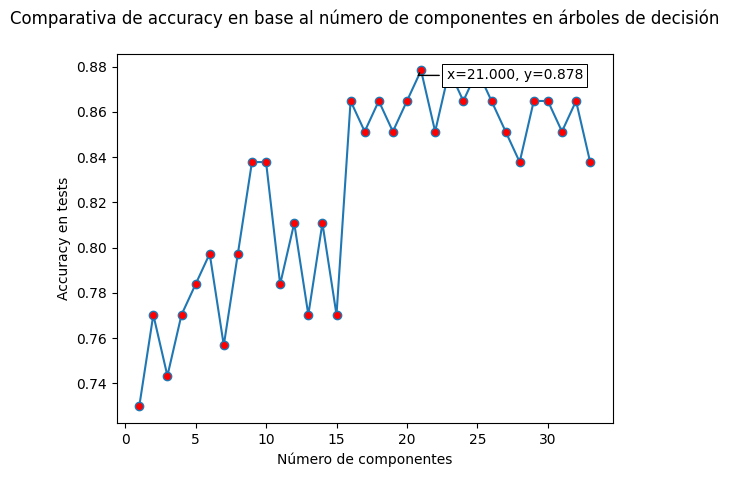

In [42]:
# Estudie el efecto del análisis en componentes principales sobre el árbol de decisión y el vecino más cercano.
# Comente lo resultados. Estudie el efecto según el número de componentes retenidas.

from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.model_selection import train_test_split

"""
Análisis de componentes principales (PCA).

Reducción lineal de la dimensionalidad mediante la descomposición del valor singular de los datos para proyectarlos a un espacio de menor dimensión. Los datos de entrada se centran pero no se escalan para cada característica antes de aplicar la SVD.

Utiliza la implementación LAPACK de la SVD completa o una SVD truncada aleatoria por el método de Halko et al. 2009, dependiendo de la forma de los datos de entrada y del número de componentes a extraer.

También puede utilizar la implementación scipy.sparse.linalg ARPACK del SVD truncado.

Tenga en cuenta que esta clase no soporta la entrada dispersa. Ver TruncatedSVD para una alternativa con datos dispersos.
"""

"""

"""

# Ionosphere

current_df = df_iono_normalized_rescaled

X_train, X_test, y_train, y_test = train_test_split(current_df.iloc[:, 0:len(current_df.columns) - 1],
                                                    current_df.iloc[:, len(current_df.columns) - 1], random_state=42,
                                                    test_size=0.3)

best_comb = [0.0, 0]
best_pca = None

x_plot = []
y_plot = []

for n in range(1, len(current_df.columns) - 1):
    pca = PCA(n_components=n)
    pca.fit(X_train, y_train)
    x_plot.append(n)

    new_x = pca.fit_transform(X_train, y_train)

    new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_x, y_train, random_state=42, test_size=0.3)

    clf = tree.DecisionTreeClassifier()

    # print(new_x.shape, y_train.shape) deben tener el mismo shape
    clf = clf.fit(new_X_train, new_y_train)
    print(f"{n} components used in PCA: {clf.score(new_X_test, new_y_test)}")
    y_plot.append(clf.score(new_X_test, new_y_test))

    if clf.score(new_X_test, new_y_test) > best_comb[0]:
        best_comb[0] = clf.score(new_X_test, new_y_test)
        best_comb[1] = n
        best_pca = pca

print(f"The best number of components to use is {best_comb[1]}, with an accuracy in test of: {best_comb[0]}")
print(best_pca.explained_variance_ratio_)
print(best_pca.singular_values_)

import numpy as np


def annot_max(x, y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text = "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax = plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops = dict(arrowstyle="-", connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data', textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94, 0.96), **kw)


annot_max(np.array(x_plot), np.array(y_plot))

plt.plot(x_plot, y_plot, marker='o', mfc='r')
plt.xlabel('Número de componentes')
plt.ylabel('Accuracy en tests')
plt.title('Comparativa de accuracy en base al número de componentes en árboles de decisión\n')
plt.show()


# https://en.wikipedia.org/wiki/Principal_component_analysis


# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

1 components used in PCA: 0.6621621621621622
2 components used in PCA: 0.7567567567567568
3 components used in PCA: 0.8108108108108109
4 components used in PCA: 0.8243243243243243
5 components used in PCA: 0.8243243243243243
6 components used in PCA: 0.8108108108108109
7 components used in PCA: 0.7972972972972973
8 components used in PCA: 0.7837837837837838
9 components used in PCA: 0.7702702702702703
10 components used in PCA: 0.7837837837837838
11 components used in PCA: 0.7567567567567568
12 components used in PCA: 0.7972972972972973
13 components used in PCA: 0.8108108108108109
14 components used in PCA: 0.8243243243243243
15 components used in PCA: 0.8243243243243243
16 components used in PCA: 0.8243243243243243
17 components used in PCA: 0.8243243243243243
18 components used in PCA: 0.8108108108108109
19 components used in PCA: 0.7972972972972973
20 components used in PCA: 0.8108108108108109
21 components used in PCA: 0.7972972972972973
22 components used in PCA: 0.79729729729729

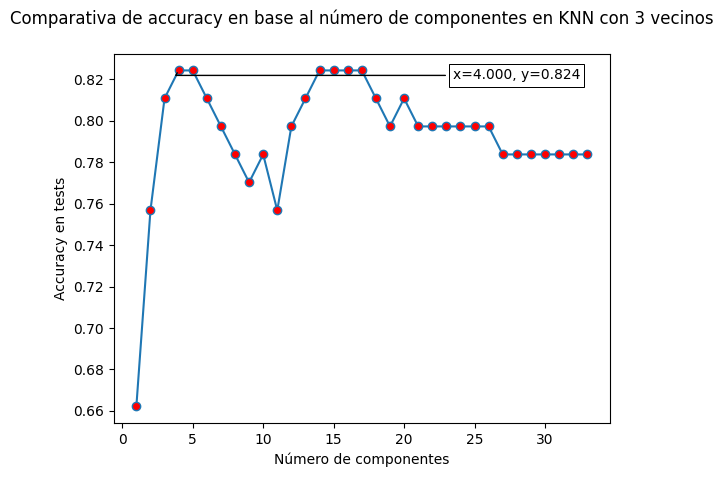

In [43]:
# Ahora con el KNN

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier



"""
Análisis de componentes principales (PCA).

Reducción lineal de la dimensionalidad mediante la descomposición del valor singular de los datos para proyectarlos a un espacio de menor dimensión. Los datos de entrada se centran pero no se escalan para cada característica antes de aplicar la SVD.

Utiliza la implementación LAPACK de la SVD completa o una SVD truncada aleatoria por el método de Halko et al. 2009, dependiendo de la forma de los datos de entrada y del número de componentes a extraer.

También puede utilizar la implementación scipy.sparse.linalg ARPACK del SVD truncado.

Tenga en cuenta que esta clase no soporta la entrada dispersa. Ver TruncatedSVD para una alternativa con datos dispersos.
"""

"""

"""

current_df = df_iono_normalized_rescaled

X_train, X_test, y_train, y_test = train_test_split(current_df.iloc[:, 0:len(current_df.columns) - 1], current_df.iloc[:, len(current_df.columns) - 1], random_state=42, test_size=0.3)

best_comb = [0.0, 0]
best_pca = None

x_plot = []
y_plot = []

for n in range(1,len(current_df.columns) - 1):
  pca = PCA(n_components=n)
  pca.fit(X_train, y_train)
  x_plot.append(n)

  new_x = pca.fit_transform(X_train, y_train)

  new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_x, y_train, random_state=42, test_size=0.3)

  # Lo vamos a dejar con 3 vecinos
  knn = KNeighborsClassifier(n_neighbors=3)
  knn.fit(new_X_train, new_y_train)

  # print(new_x.shape, y_train.shape) deben tener el mismo shape

  print(f"{n} components used in PCA: {knn.score(new_X_test, new_y_test)}")
  y_plot.append(knn.score(new_X_test, new_y_test))

  if knn.score(new_X_test, new_y_test) > best_comb[0]:
    best_comb[0] = knn.score(new_X_test, new_y_test)
    best_comb[1] = n
    best_pca = pca

print(f"The best number of components to use is {best_comb[1]}, with an accuracy in test of: {best_comb[0]}")
print(best_pca.explained_variance_ratio_)
print(best_pca.singular_values_)

import numpy as np

def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(np.array(x_plot), np.array(y_plot))

plt.plot(x_plot, y_plot, marker = 'o', mfc = 'r')
plt.xlabel('Número de componentes')
plt.ylabel('Accuracy en tests')
plt.title('Comparativa de accuracy en base al número de componentes en KNN con 3 vecinos\n')
plt.show()


# https://en.wikipedia.org/wiki/Principal_component_analysis


# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

1 components used in PCA: 0.6851851851851852
2 components used in PCA: 0.6975308641975309
3 components used in PCA: 0.6172839506172839
4 components used in PCA: 0.6419753086419753
5 components used in PCA: 0.6604938271604939
6 components used in PCA: 0.6666666666666666
7 components used in PCA: 0.6975308641975309
The best number of components to use is 2, with an accuracy in test of: 0.6975308641975309
[0.25327878 0.21893528]
[32.4897259  30.20678642]


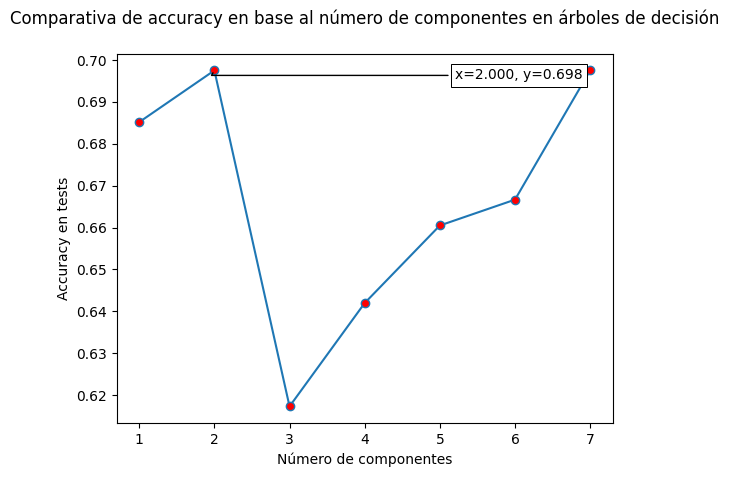

In [44]:
# Estudie el efecto del análisis en componentes principales sobre el árbol de decisión y el vecino más cercano.
# Comente lo resultados. Estudie el efecto según el número de componentes retenidas.

from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.model_selection import train_test_split

"""
Análisis de componentes principales (PCA).

Reducción lineal de la dimensionalidad mediante la descomposición del valor singular de los datos para proyectarlos a un espacio de menor dimensión. Los datos de entrada se centran pero no se escalan para cada característica antes de aplicar la SVD.

Utiliza la implementación LAPACK de la SVD completa o una SVD truncada aleatoria por el método de Halko et al. 2009, dependiendo de la forma de los datos de entrada y del número de componentes a extraer.

También puede utilizar la implementación scipy.sparse.linalg ARPACK del SVD truncado.

Tenga en cuenta que esta clase no soporta la entrada dispersa. Ver TruncatedSVD para una alternativa con datos dispersos.
"""

"""

"""

# Ionosphere

current_df = df_diabe_normalized_rescaled

X_train, X_test, y_train, y_test = train_test_split(current_df.iloc[:, 0:len(current_df.columns) - 1],
                                                    current_df.iloc[:, len(current_df.columns) - 1], random_state=42,
                                                    test_size=0.3)

best_comb = [0.0, 0]
best_pca = None

x_plot = []
y_plot = []

for n in range(1, len(current_df.columns) - 1):
    pca = PCA(n_components=n)
    pca.fit(X_train, y_train)
    x_plot.append(n)

    new_x = pca.fit_transform(X_train, y_train)

    new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_x, y_train, random_state=42, test_size=0.3)

    clf = tree.DecisionTreeClassifier()

    # print(new_x.shape, y_train.shape) deben tener el mismo shape
    clf = clf.fit(new_X_train, new_y_train)
    print(f"{n} components used in PCA: {clf.score(new_X_test, new_y_test)}")
    y_plot.append(clf.score(new_X_test, new_y_test))

    if clf.score(new_X_test, new_y_test) > best_comb[0]:
        best_comb[0] = clf.score(new_X_test, new_y_test)
        best_comb[1] = n
        best_pca = pca

print(f"The best number of components to use is {best_comb[1]}, with an accuracy in test of: {best_comb[0]}")
print(best_pca.explained_variance_ratio_)
print(best_pca.singular_values_)

import numpy as np


def annot_max(x, y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text = "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax = plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops = dict(arrowstyle="-", connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data', textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94, 0.96), **kw)


annot_max(np.array(x_plot), np.array(y_plot))

plt.plot(x_plot, y_plot, marker='o', mfc='r')
plt.xlabel('Número de componentes')
plt.ylabel('Accuracy en tests')
plt.title('Comparativa de accuracy en base al número de componentes en árboles de decisión\n')
plt.show()


# https://en.wikipedia.org/wiki/Principal_component_analysis


# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

1 components used in PCA: 0.6851851851851852
2 components used in PCA: 0.6975308641975309
3 components used in PCA: 0.6790123456790124
4 components used in PCA: 0.7222222222222222
5 components used in PCA: 0.7098765432098766
6 components used in PCA: 0.7222222222222222
7 components used in PCA: 0.7037037037037037
The best number of components to use is 4, with an accuracy in test of: 0.7222222222222222
[0.25327878 0.21893528 0.13109381 0.11808609]
[32.4897259  30.20678642 23.37425269 22.18431449]


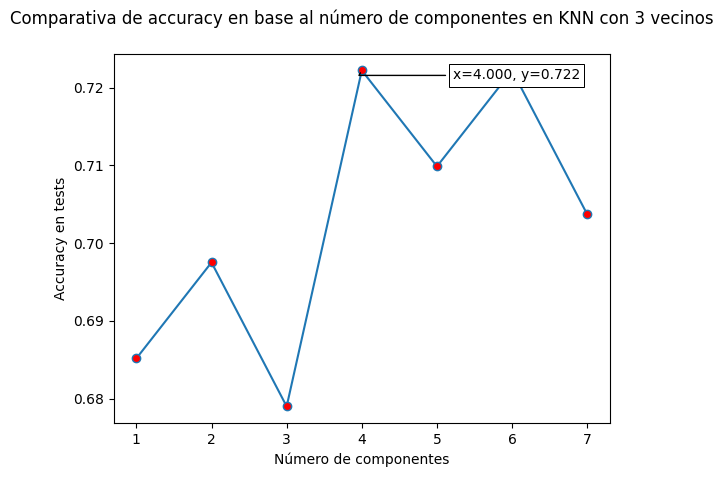

In [45]:
# Ahora con el KNN

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier



"""
Análisis de componentes principales (PCA).

Reducción lineal de la dimensionalidad mediante la descomposición del valor singular de los datos para proyectarlos a un espacio de menor dimensión. Los datos de entrada se centran pero no se escalan para cada característica antes de aplicar la SVD.

Utiliza la implementación LAPACK de la SVD completa o una SVD truncada aleatoria por el método de Halko et al. 2009, dependiendo de la forma de los datos de entrada y del número de componentes a extraer.

También puede utilizar la implementación scipy.sparse.linalg ARPACK del SVD truncado.

Tenga en cuenta que esta clase no soporta la entrada dispersa. Ver TruncatedSVD para una alternativa con datos dispersos.
"""

"""

"""

current_df = df_diabe_normalized_rescaled

X_train, X_test, y_train, y_test = train_test_split(current_df.iloc[:, 0:len(current_df.columns) - 1], current_df.iloc[:, len(current_df.columns) - 1], random_state=42, test_size=0.3)

best_comb = [0.0, 0]
best_pca = None

x_plot = []
y_plot = []

for n in range(1,len(current_df.columns) - 1):
  pca = PCA(n_components=n)
  pca.fit(X_train, y_train)
  x_plot.append(n)

  new_x = pca.fit_transform(X_train, y_train)

  new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_x, y_train, random_state=42, test_size=0.3)

  # Lo vamos a dejar con 3 vecinos
  knn = KNeighborsClassifier(n_neighbors=3)
  knn.fit(new_X_train, new_y_train)

  # print(new_x.shape, y_train.shape) deben tener el mismo shape

  print(f"{n} components used in PCA: {knn.score(new_X_test, new_y_test)}")
  y_plot.append(knn.score(new_X_test, new_y_test))

  if knn.score(new_X_test, new_y_test) > best_comb[0]:
    best_comb[0] = knn.score(new_X_test, new_y_test)
    best_comb[1] = n
    best_pca = pca

print(f"The best number of components to use is {best_comb[1]}, with an accuracy in test of: {best_comb[0]}")
print(best_pca.explained_variance_ratio_)
print(best_pca.singular_values_)

import numpy as np

def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(np.array(x_plot), np.array(y_plot))

plt.plot(x_plot, y_plot, marker = 'o', mfc = 'r')
plt.xlabel('Número de componentes')
plt.ylabel('Accuracy en tests')
plt.title('Comparativa de accuracy en base al número de componentes en KNN con 3 vecinos\n')
plt.show()


# https://en.wikipedia.org/wiki/Principal_component_analysis


# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

1 components used in PCA: 0.46130952380952384
2 components used in PCA: 0.5416666666666666
3 components used in PCA: 0.5982142857142857
4 components used in PCA: 0.5684523809523809
5 components used in PCA: 0.5476190476190477
6 components used in PCA: 0.5148809523809523
7 components used in PCA: 0.5327380952380952
8 components used in PCA: 0.5982142857142857
9 components used in PCA: 0.5625
10 components used in PCA: 0.5446428571428571
The best number of components to use is 3, with an accuracy in test of: 0.5982142857142857
[0.27678308 0.17266104 0.13949985]
[58.30346715 46.04916869 41.39153103]


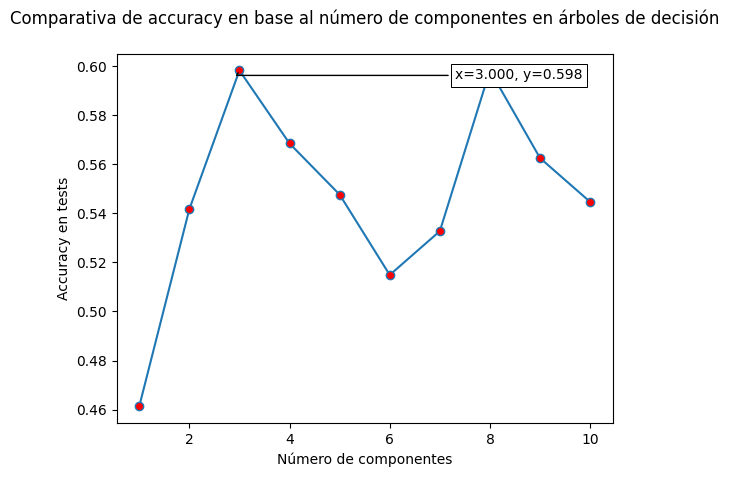

In [46]:
# Estudie el efecto del análisis en componentes principales sobre el árbol de decisión y el vecino más cercano.
# Comente lo resultados. Estudie el efecto según el número de componentes retenidas.

from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

"""
Análisis de componentes principales (PCA).

Reducción lineal de la dimensionalidad mediante la descomposición del valor singular de los datos para proyectarlos a un espacio de menor dimensión. Los datos de entrada se centran pero no se escalan para cada característica antes de aplicar la SVD.

Utiliza la implementación LAPACK de la SVD completa o una SVD truncada aleatoria por el método de Halko et al. 2009, dependiendo de la forma de los datos de entrada y del número de componentes a extraer.

También puede utilizar la implementación scipy.sparse.linalg ARPACK del SVD truncado.

Tenga en cuenta que esta clase no soporta la entrada dispersa. Ver TruncatedSVD para una alternativa con datos dispersos.
"""

"""

"""

# Ionosphere

current_df = df_wine_normalized_rescaled

lab = preprocessing.LabelEncoder()

X_train, X_test, y_train, y_test = train_test_split(current_df.iloc[:, 0:len(current_df.columns) - 1],
                                                    current_df.iloc[:, len(current_df.columns) - 1], random_state=42,
                                                    test_size=0.3)

y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)

best_comb = [0.0, 0]
best_pca = None

x_plot = []
y_plot = []

for n in range(1, len(current_df.columns) - 1):
    pca = PCA(n_components=n)
    pca.fit(X_train, y_train)
    x_plot.append(n)

    new_x = pca.fit_transform(X_train, y_train)

    new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_x, y_train, random_state=42, test_size=0.3)

    clf = tree.DecisionTreeClassifier()

    # print(new_x.shape, y_train.shape) deben tener el mismo shape
    clf = clf.fit(new_X_train, new_y_train)
    print(f"{n} components used in PCA: {clf.score(new_X_test, new_y_test)}")
    y_plot.append(clf.score(new_X_test, new_y_test))

    if clf.score(new_X_test, new_y_test) > best_comb[0]:
        best_comb[0] = clf.score(new_X_test, new_y_test)
        best_comb[1] = n
        best_pca = pca

print(f"The best number of components to use is {best_comb[1]}, with an accuracy in test of: {best_comb[0]}")
print(best_pca.explained_variance_ratio_)
print(best_pca.singular_values_)

import numpy as np


def annot_max(x, y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text = "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax = plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops = dict(arrowstyle="-", connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data', textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94, 0.96), **kw)


annot_max(np.array(x_plot), np.array(y_plot))

plt.plot(x_plot, y_plot, marker='o', mfc='r')
plt.xlabel('Número de componentes')
plt.ylabel('Accuracy en tests')
plt.title('Comparativa de accuracy en base al número de componentes en árboles de decisión\n')
plt.show()


# https://en.wikipedia.org/wiki/Principal_component_analysis


# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

1 components used in PCA: 0.6851851851851852
2 components used in PCA: 0.6975308641975309
3 components used in PCA: 0.6790123456790124
4 components used in PCA: 0.7222222222222222
5 components used in PCA: 0.7098765432098766
6 components used in PCA: 0.7222222222222222
7 components used in PCA: 0.7037037037037037
The best number of components to use is 4, with an accuracy in test of: 0.7222222222222222
[0.25327878 0.21893528 0.13109381 0.11808609]
[32.4897259  30.20678642 23.37425269 22.18431449]


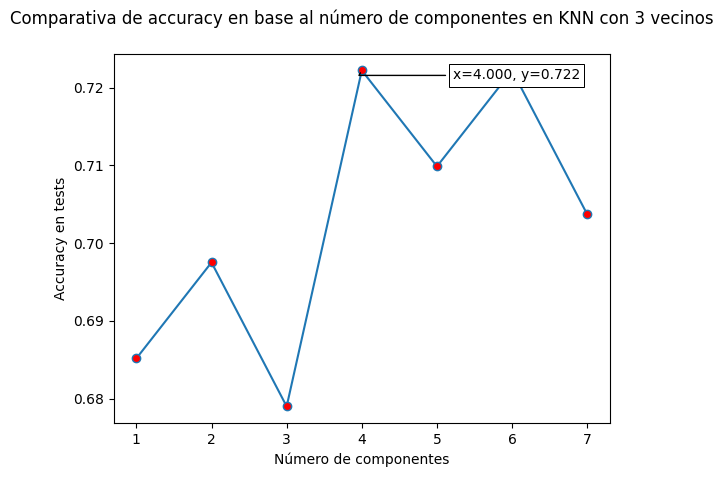

In [47]:
# Ahora con el KNN

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier



"""
Análisis de componentes principales (PCA).

Reducción lineal de la dimensionalidad mediante la descomposición del valor singular de los datos para proyectarlos a un espacio de menor dimensión. Los datos de entrada se centran pero no se escalan para cada característica antes de aplicar la SVD.

Utiliza la implementación LAPACK de la SVD completa o una SVD truncada aleatoria por el método de Halko et al. 2009, dependiendo de la forma de los datos de entrada y del número de componentes a extraer.

También puede utilizar la implementación scipy.sparse.linalg ARPACK del SVD truncado.

Tenga en cuenta que esta clase no soporta la entrada dispersa. Ver TruncatedSVD para una alternativa con datos dispersos.
"""

"""

"""

current_df = df_diabe_normalized_rescaled

lab = preprocessing.LabelEncoder()

X_train, X_test, y_train, y_test = train_test_split(current_df.iloc[:, 0:len(current_df.columns) - 1], current_df.iloc[:, len(current_df.columns) - 1], random_state=42, test_size=0.3)

y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)

best_comb = [0.0, 0]
best_pca = None

x_plot = []
y_plot = []

for n in range(1,len(current_df.columns) - 1):
  pca = PCA(n_components=n)
  pca.fit(X_train, y_train)
  x_plot.append(n)

  new_x = pca.fit_transform(X_train, y_train)

  new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_x, y_train, random_state=42, test_size=0.3)

  # Lo vamos a dejar con 3 vecinos
  knn = KNeighborsClassifier(n_neighbors=3)
  knn.fit(new_X_train, new_y_train)

  # print(new_x.shape, y_train.shape) deben tener el mismo shape

  print(f"{n} components used in PCA: {knn.score(new_X_test, new_y_test)}")
  y_plot.append(knn.score(new_X_test, new_y_test))

  if knn.score(new_X_test, new_y_test) > best_comb[0]:
    best_comb[0] = knn.score(new_X_test, new_y_test)
    best_comb[1] = n
    best_pca = pca

print(f"The best number of components to use is {best_comb[1]}, with an accuracy in test of: {best_comb[0]}")
print(best_pca.explained_variance_ratio_)
print(best_pca.singular_values_)

import numpy as np

def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(np.array(x_plot), np.array(y_plot))

plt.plot(x_plot, y_plot, marker = 'o', mfc = 'r')
plt.xlabel('Número de componentes')
plt.ylabel('Accuracy en tests')
plt.title('Comparativa de accuracy en base al número de componentes en KNN con 3 vecinos\n')
plt.show()


# https://en.wikipedia.org/wiki/Principal_component_analysis


# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

1 components used in PCA: 0.875
2 components used in PCA: 0.84375
3 components used in PCA: 0.875
The best number of components to use is 1, with an accuracy in test of: 0.875
[0.71191753]
[16.89509211]


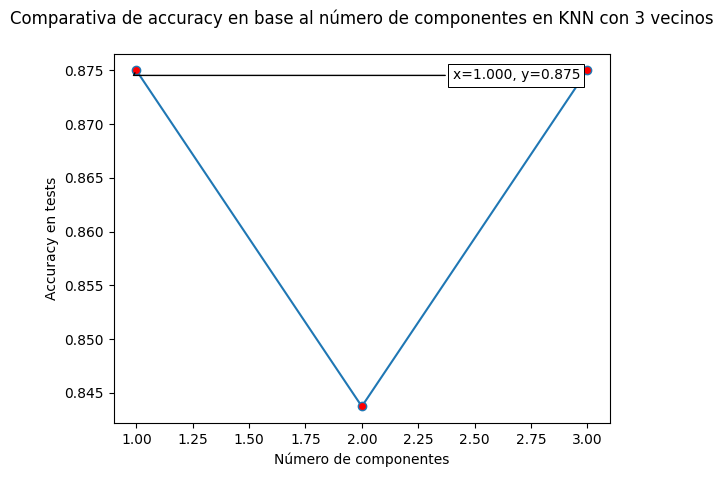

In [48]:
# Ahora con el KNN

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier



"""
Análisis de componentes principales (PCA).

Reducción lineal de la dimensionalidad mediante la descomposición del valor singular de los datos para proyectarlos a un espacio de menor dimensión. Los datos de entrada se centran pero no se escalan para cada característica antes de aplicar la SVD.

Utiliza la implementación LAPACK de la SVD completa o una SVD truncada aleatoria por el método de Halko et al. 2009, dependiendo de la forma de los datos de entrada y del número de componentes a extraer.

También puede utilizar la implementación scipy.sparse.linalg ARPACK del SVD truncado.

Tenga en cuenta que esta clase no soporta la entrada dispersa. Ver TruncatedSVD para una alternativa con datos dispersos.
"""

"""

"""

current_df = df_iris_normalized_rescaled

X_train, X_test, y_train, y_test = train_test_split(current_df.iloc[:, 0:len(current_df.columns) - 1], current_df.iloc[:, len(current_df.columns) - 1], random_state=42, test_size=0.3)

best_comb = [0.0, 0]
best_pca = None

x_plot = []
y_plot = []

for n in range(1,len(current_df.columns) - 1):
  pca = PCA(n_components=n)
  pca.fit(X_train, y_train)
  x_plot.append(n)

  new_x = pca.fit_transform(X_train, y_train)

  new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_x, y_train, random_state=42, test_size=0.3)

  # Lo vamos a dejar con 3 vecinos
  knn = KNeighborsClassifier(n_neighbors=3)
  knn.fit(new_X_train, new_y_train)

  # print(new_x.shape, y_train.shape) deben tener el mismo shape

  print(f"{n} components used in PCA: {knn.score(new_X_test, new_y_test)}")
  y_plot.append(knn.score(new_X_test, new_y_test))

  if knn.score(new_X_test, new_y_test) > best_comb[0]:
    best_comb[0] = knn.score(new_X_test, new_y_test)
    best_comb[1] = n
    best_pca = pca

print(f"The best number of components to use is {best_comb[1]}, with an accuracy in test of: {best_comb[0]}")
print(best_pca.explained_variance_ratio_)
print(best_pca.singular_values_)

import numpy as np

def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(np.array(x_plot), np.array(y_plot))

plt.plot(x_plot, y_plot, marker = 'o', mfc = 'r')
plt.xlabel('Número de componentes')
plt.ylabel('Accuracy en tests')
plt.title('Comparativa de accuracy en base al número de componentes en KNN con 3 vecinos\n')
plt.show()


# https://en.wikipedia.org/wiki/Principal_component_analysis


# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

1 components used in PCA: 0.875
2 components used in PCA: 0.875
3 components used in PCA: 0.9375
The best number of components to use is 3, with an accuracy in test of: 0.9375
[0.71191753 0.23894068 0.04395487]
[16.89509211  9.78792814  4.19806552]


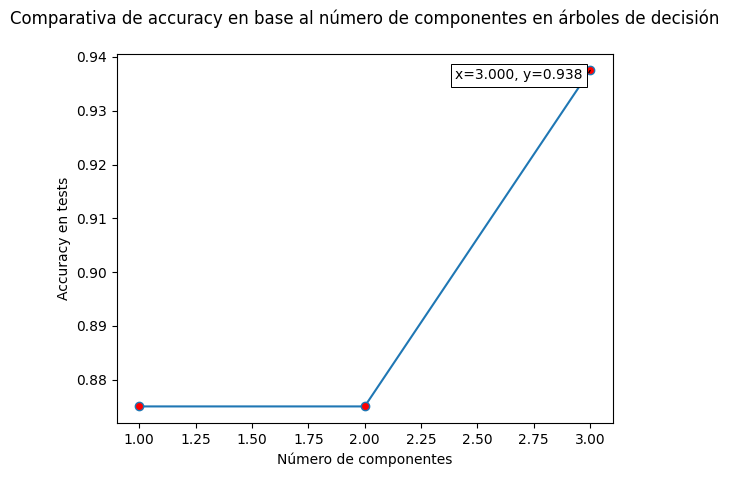

In [49]:
# Estudie el efecto del análisis en componentes principales sobre el árbol de decisión y el vecino más cercano.
# Comente lo resultados. Estudie el efecto según el número de componentes retenidas.

from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

"""
Análisis de componentes principales (PCA).

Reducción lineal de la dimensionalidad mediante la descomposición del valor singular de los datos para proyectarlos a un espacio de menor dimensión. Los datos de entrada se centran pero no se escalan para cada característica antes de aplicar la SVD.

Utiliza la implementación LAPACK de la SVD completa o una SVD truncada aleatoria por el método de Halko et al. 2009, dependiendo de la forma de los datos de entrada y del número de componentes a extraer.

También puede utilizar la implementación scipy.sparse.linalg ARPACK del SVD truncado.

Tenga en cuenta que esta clase no soporta la entrada dispersa. Ver TruncatedSVD para una alternativa con datos dispersos.
"""

"""

"""

# Ionosphere

current_df = df_iris_normalized_rescaled

X_train, X_test, y_train, y_test = train_test_split(current_df.iloc[:, 0:len(current_df.columns) - 1],
                                                    current_df.iloc[:, len(current_df.columns) - 1], random_state=42,
                                                    test_size=0.3)

best_comb = [0.0, 0]
best_pca = None

x_plot = []
y_plot = []

for n in range(1, len(current_df.columns) - 1):
    pca = PCA(n_components=n)
    pca.fit(X_train, y_train)
    x_plot.append(n)

    new_x = pca.fit_transform(X_train, y_train)

    new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_x, y_train, random_state=42, test_size=0.3)

    clf = tree.DecisionTreeClassifier()

    # print(new_x.shape, y_train.shape) deben tener el mismo shape
    clf = clf.fit(new_X_train, new_y_train)
    print(f"{n} components used in PCA: {clf.score(new_X_test, new_y_test)}")
    y_plot.append(clf.score(new_X_test, new_y_test))

    if clf.score(new_X_test, new_y_test) > best_comb[0]:
        best_comb[0] = clf.score(new_X_test, new_y_test)
        best_comb[1] = n
        best_pca = pca

print(f"The best number of components to use is {best_comb[1]}, with an accuracy in test of: {best_comb[0]}")
print(best_pca.explained_variance_ratio_)
print(best_pca.singular_values_)

import numpy as np


def annot_max(x, y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text = "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax = plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops = dict(arrowstyle="-", connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data', textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94, 0.96), **kw)


annot_max(np.array(x_plot), np.array(y_plot))

plt.plot(x_plot, y_plot, marker='o', mfc='r')
plt.xlabel('Número de componentes')
plt.ylabel('Accuracy en tests')
plt.title('Comparativa de accuracy en base al número de componentes en árboles de decisión\n')
plt.show()


# https://en.wikipedia.org/wiki/Principal_component_analysis


# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

1 components used in PCA: 0.0
2 components used in PCA: 0.045454545454545456
3 components used in PCA: 0.06818181818181818
4 components used in PCA: 0.06818181818181818
5 components used in PCA: 0.06818181818181818
The best number of components to use is 3, with an accuracy in test of: 0.06818181818181818
[0.52482128 0.17947789 0.13785277]
[18.96403601 11.08997415  9.71925109]


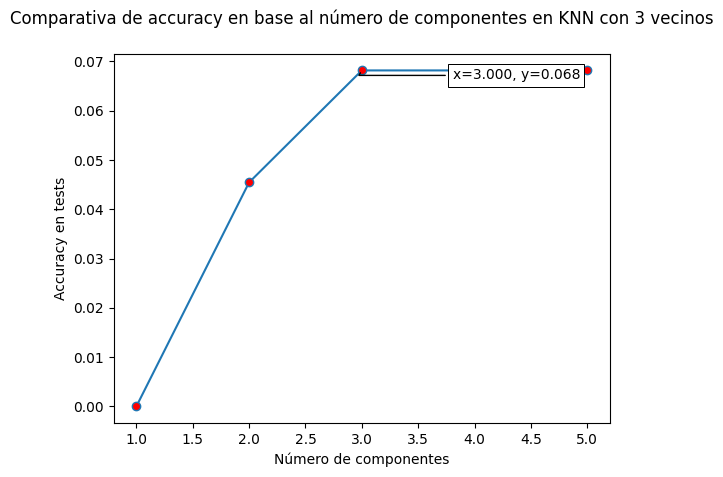

In [50]:
# Ahora con el KNN

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier



"""
Análisis de componentes principales (PCA).

Reducción lineal de la dimensionalidad mediante la descomposición del valor singular de los datos para proyectarlos a un espacio de menor dimensión. Los datos de entrada se centran pero no se escalan para cada característica antes de aplicar la SVD.

Utiliza la implementación LAPACK de la SVD completa o una SVD truncada aleatoria por el método de Halko et al. 2009, dependiendo de la forma de los datos de entrada y del número de componentes a extraer.

También puede utilizar la implementación scipy.sparse.linalg ARPACK del SVD truncado.

Tenga en cuenta que esta clase no soporta la entrada dispersa. Ver TruncatedSVD para una alternativa con datos dispersos.
"""

"""

"""

current_df = df_cpu_normalized_rescaled

lab = preprocessing.LabelEncoder()

X_train, X_test, y_train, y_test = train_test_split(current_df.iloc[:, 0:len(current_df.columns) - 1], current_df.iloc[:, len(current_df.columns) - 1], random_state=42, test_size=0.3)

y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)

best_comb = [0.0, 0]
best_pca = None

x_plot = []
y_plot = []

for n in range(1,len(current_df.columns) - 1):
  pca = PCA(n_components=n)
  pca.fit(X_train, y_train)
  x_plot.append(n)

  new_x = pca.fit_transform(X_train, y_train)

  new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_x, y_train, random_state=42, test_size=0.3)

  # Lo vamos a dejar con 3 vecinos
  knn = KNeighborsClassifier(n_neighbors=3)
  knn.fit(new_X_train, new_y_train)

  # print(new_x.shape, y_train.shape) deben tener el mismo shape

  print(f"{n} components used in PCA: {knn.score(new_X_test, new_y_test)}")
  y_plot.append(knn.score(new_X_test, new_y_test))

  if knn.score(new_X_test, new_y_test) > best_comb[0]:
    best_comb[0] = knn.score(new_X_test, new_y_test)
    best_comb[1] = n
    best_pca = pca

print(f"The best number of components to use is {best_comb[1]}, with an accuracy in test of: {best_comb[0]}")
print(best_pca.explained_variance_ratio_)
print(best_pca.singular_values_)

import numpy as np

def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(np.array(x_plot), np.array(y_plot))

plt.plot(x_plot, y_plot, marker = 'o', mfc = 'r')
plt.xlabel('Número de componentes')
plt.ylabel('Accuracy en tests')
plt.title('Comparativa de accuracy en base al número de componentes en KNN con 3 vecinos\n')
plt.show()


# https://en.wikipedia.org/wiki/Principal_component_analysis


# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

1 components used in PCA: 0.0
2 components used in PCA: 0.022727272727272728
3 components used in PCA: 0.022727272727272728
4 components used in PCA: 0.0
5 components used in PCA: 0.0
The best number of components to use is 2, with an accuracy in test of: 0.022727272727272728
[0.52482128 0.17947789]
[18.96403601 11.08997415]


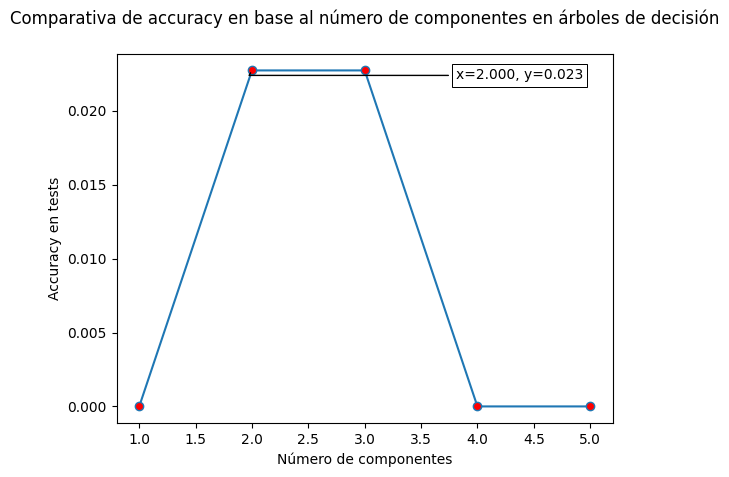

In [51]:
# Estudie el efecto del análisis en componentes principales sobre el árbol de decisión y el vecino más cercano.
# Comente lo resultados. Estudie el efecto según el número de componentes retenidas.

from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

"""
Análisis de componentes principales (PCA).

Reducción lineal de la dimensionalidad mediante la descomposición del valor singular de los datos para proyectarlos a un espacio de menor dimensión. Los datos de entrada se centran pero no se escalan para cada característica antes de aplicar la SVD.

Utiliza la implementación LAPACK de la SVD completa o una SVD truncada aleatoria por el método de Halko et al. 2009, dependiendo de la forma de los datos de entrada y del número de componentes a extraer.

También puede utilizar la implementación scipy.sparse.linalg ARPACK del SVD truncado.

Tenga en cuenta que esta clase no soporta la entrada dispersa. Ver TruncatedSVD para una alternativa con datos dispersos.
"""

"""

"""

# Ionosphere

current_df = df_cpu_normalized_rescaled

lab = preprocessing.LabelEncoder()

X_train, X_test, y_train, y_test = train_test_split(current_df.iloc[:, 0:len(current_df.columns) - 1],
                                                    current_df.iloc[:, len(current_df.columns) - 1], random_state=42,
                                                    test_size=0.3)

y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)

best_comb = [0.0, 0]
best_pca = None

x_plot = []
y_plot = []

for n in range(1, len(current_df.columns) - 1):
    pca = PCA(n_components=n)
    pca.fit(X_train, y_train)
    x_plot.append(n)

    new_x = pca.fit_transform(X_train, y_train)

    new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_x, y_train, random_state=42, test_size=0.3)

    clf = tree.DecisionTreeClassifier()

    # print(new_x.shape, y_train.shape) deben tener el mismo shape
    clf = clf.fit(new_X_train, new_y_train)
    print(f"{n} components used in PCA: {clf.score(new_X_test, new_y_test)}")
    y_plot.append(clf.score(new_X_test, new_y_test))

    if clf.score(new_X_test, new_y_test) > best_comb[0]:
        best_comb[0] = clf.score(new_X_test, new_y_test)
        best_comb[1] = n
        best_pca = pca

print(f"The best number of components to use is {best_comb[1]}, with an accuracy in test of: {best_comb[0]}")
print(best_pca.explained_variance_ratio_)
print(best_pca.singular_values_)

import numpy as np


def annot_max(x, y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text = "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax = plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops = dict(arrowstyle="-", connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data', textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94, 0.96), **kw)


annot_max(np.array(x_plot), np.array(y_plot))

plt.plot(x_plot, y_plot, marker='o', mfc='r')
plt.xlabel('Número de componentes')
plt.ylabel('Accuracy en tests')
plt.title('Comparativa de accuracy en base al número de componentes en árboles de decisión\n')
plt.show()


# https://en.wikipedia.org/wiki/Principal_component_analysis


# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

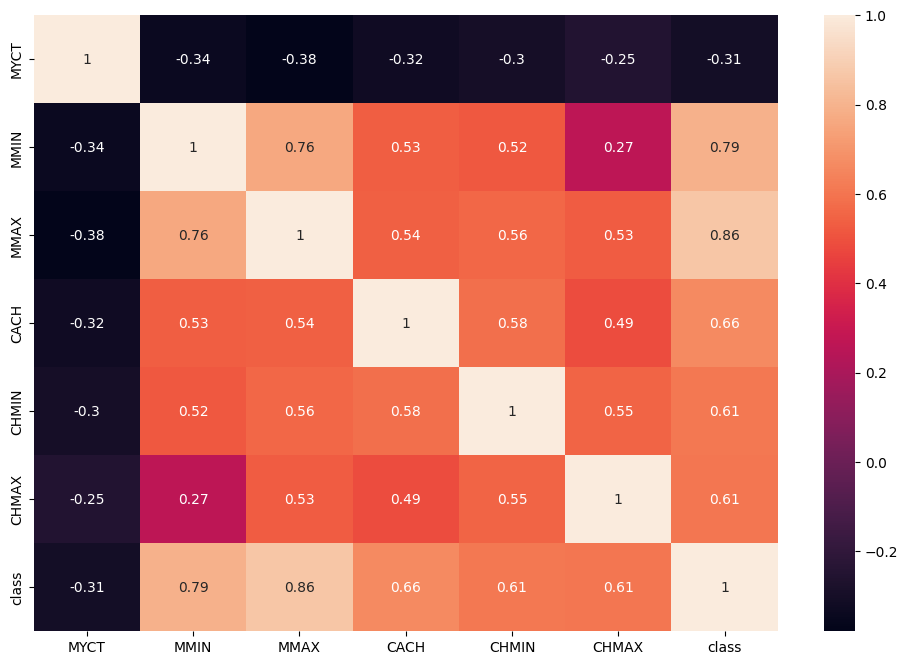

In [52]:
import seaborn as sns

current_df = df_cpu_normalized_rescaled

corr = current_df.corr()

plt.figure(figsize=(12,8),linewidth=10)
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True)

plt.show()

# Exercise 5

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

df_stratified = df_cpu_normalized_rescaled.groupby('class', group_keys=False).apply(lambda x: x.sample(frac=0.1))

X_train, X_test, y_train, y_test = train_test_split(df_stratified.iloc[:, 0:len(df_stratified.columns) - 1], df_stratified.iloc[:, len(df_stratified.columns) - 1], random_state=42, test_size=0.3)

lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train, y_train)

print(f"Score de knn con 3 vecinos con muestreo aleatorio del 10% estratificados: {knn.score(X_test, y_test)}")

X_train, X_test, y_train, y_test = train_test_split(df_stratified.iloc[:, 0:len(df_stratified.columns) - 1], df_stratified.iloc[:, len(df_stratified.columns) - 1], random_state=42, test_size=0.3)

lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)

clf = tree.DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

clf.score(X_test, y_test)


print(f"Score de árbol de decisión con muestreo aleatorio del 10% estratificados: {clf.score(X_test, y_test)}")

Score de knn con 3 vecinos con muestreo aleatorio del 10% estratificados: 0.5
Score de árbol de decisión con muestreo aleatorio del 10% estratificados: 0.5


In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

df_stratified = df_cpu_normalized_rescaled.sample(frac=0.1, replace=False)

X_train, X_test, y_train, y_test = train_test_split(df_stratified.iloc[:, 0:len(df_stratified.columns) - 1], df_stratified.iloc[:, len(df_stratified.columns) - 1], random_state=42, test_size=0.3)

lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train, y_train)

print(f"Score de knn con 3 vecinos con muestreo aleatorio del 10% estratificados: {knn.score(X_test, y_test)}")

X_train, X_test, y_train, y_test = train_test_split(df_stratified.iloc[:, 0:len(df_stratified.columns) - 1], df_stratified.iloc[:, len(df_stratified.columns) - 1], random_state=42, test_size=0.3)


lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)


clf = tree.DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

clf.score(X_test, y_test)


print(f"Score de árbol de decisión con muestreo aleatorio del 10% estratificados: {clf.score(X_test, y_test)}")

Score de knn con 3 vecinos con muestreo aleatorio del 10% estratificados: 0.0
Score de árbol de decisión con muestreo aleatorio del 10% estratificados: 0.0


# Exercise 6

In [55]:
!wget https://openmv.net/file/brittleness-index.csv

--2024-02-09 19:48:13--  https://openmv.net/file/brittleness-index.csv
Resolving openmv.net (openmv.net)... 139.162.148.246, 2a01:7e01::f03c:93ff:fedf:bf3
Connecting to openmv.net (openmv.net)|139.162.148.246|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /media/datasets/brittleness-index.csv [following]
--2024-02-09 19:48:14--  https://openmv.net/media/datasets/brittleness-index.csv
Reusing existing connection to openmv.net:443.
HTTP request sent, awaiting response... 200 OK
Length: 317 [text/csv]
Saving to: ‘brittleness-index.csv’

brittleness-index.c 100%[===================>]     317  --.-KB/s    in 0s      

2024-02-09 19:48:14 (216 MB/s) - ‘brittleness-index.csv’ saved [317/317]



In [56]:
df_britt = pd.read_csv('brittleness-index.csv')

df_britt = standardize(df_britt)
df_britt = normalize(df_britt)

df_britt.head()

,TK104,TK105,TK107
0,0.129666,0.082305,0.198783
1,0.495088,NaN,0.466531
2,0.614931,NaN,0.645030
3,0.353635,0.469136,0.377282
4,1.000000,1.000000,1.000000


In [57]:
df_stratified = df_britt

df_stratified = df_stratified.fillna(0)

In [58]:
from sklearn.impute import SimpleImputer
import numpy as np

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imp.fit(df_stratified)
transformed_df = imp.transform(df_stratified)

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

df_stratified = transformed_df

X_train, X_test, y_train, y_test = train_test_split(df_stratified[:, 0:df_stratified.shape[1] - 1], df_stratified[:, df_stratified.shape[1] - 1], random_state=42, test_size=0.3)

lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

print(f"Score de knn con 3 vecinos con muestreo aleatorio del 10% estratificados: {knn.score(X_test, y_test)}")

X_train, X_test, y_train, y_test = train_test_split(df_stratified[:, 0:df_stratified.shape[1] - 1], df_stratified[:, df_stratified.shape[1] - 1], random_state=42, test_size=0.3)


lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)


clf = tree.DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

clf.score(X_test, y_test)


print(f"Score de árbol de decisión con muestreo aleatorio del 10% estratificados: {clf.score(X_test, y_test)}")

Score de knn con 3 vecinos con muestreo aleatorio del 10% estratificados: 0.0
Score de árbol de decisión con muestreo aleatorio del 10% estratificados: 0.0
